In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data loading and exploration

In [2]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
cols = ['calories', 'protein', 'fat','sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
df[cols].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


### Comment:
`carbo`, `sugars`, `potass` have some negative values (-1). Wrong values will be replaced by something else later.

In [5]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

### Histograms for better understanding

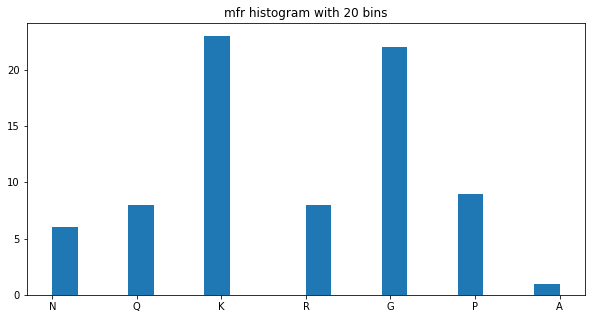

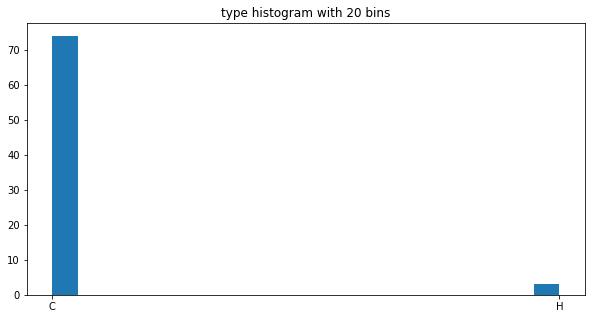

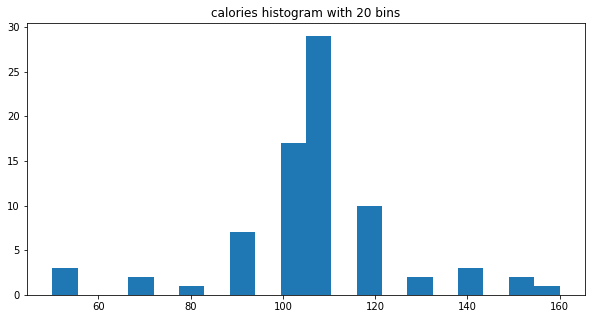

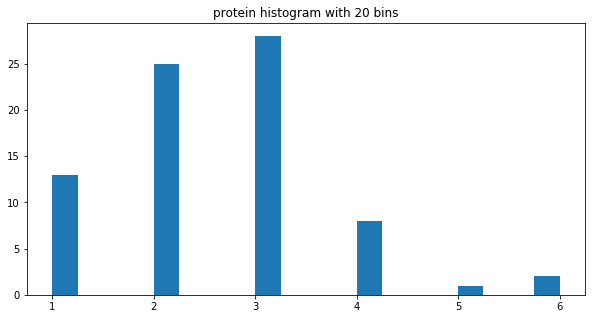

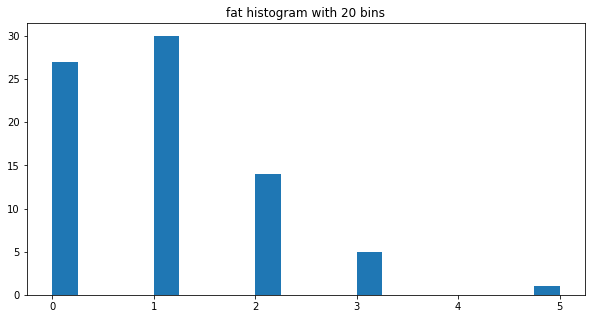

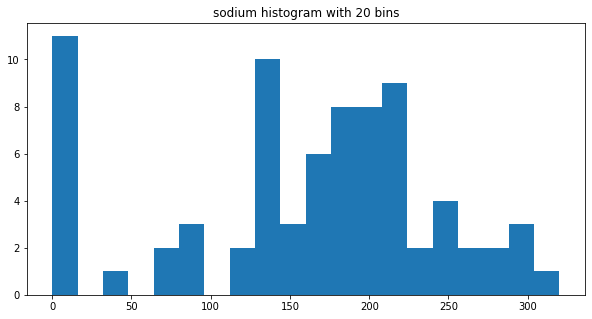

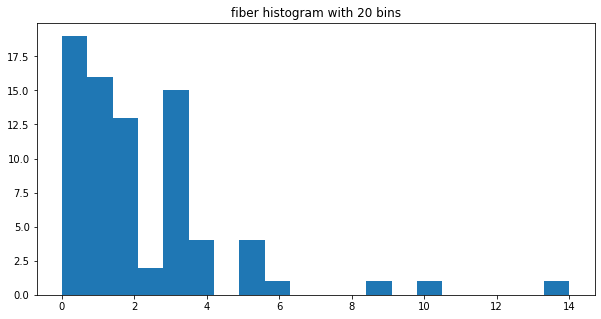

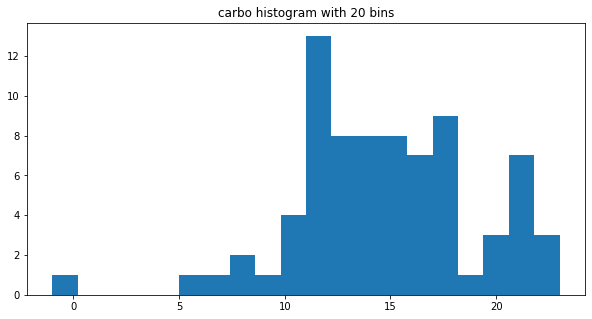

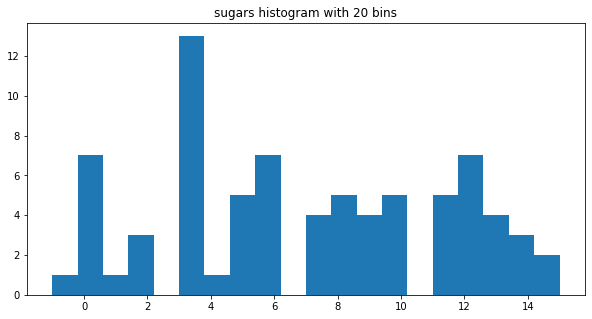

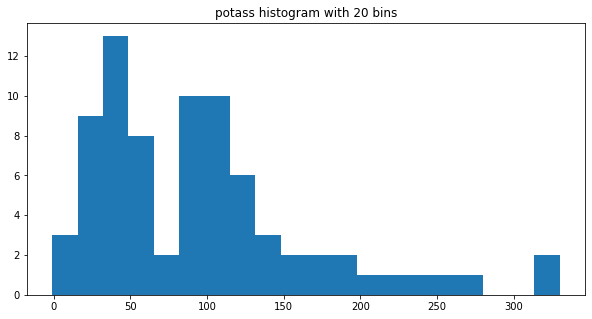

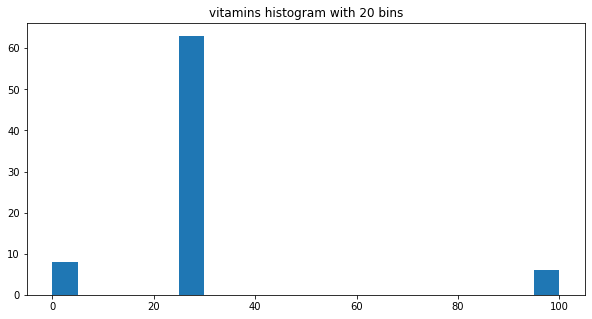

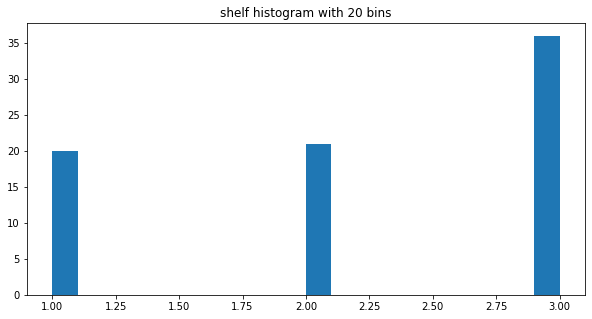

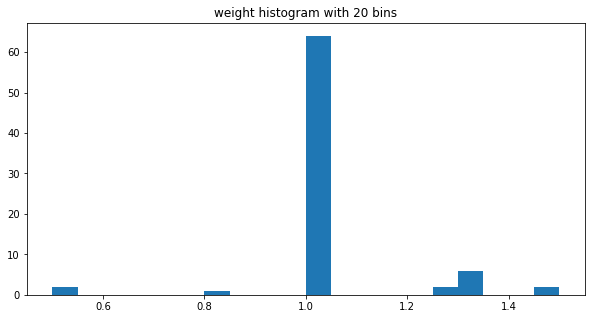

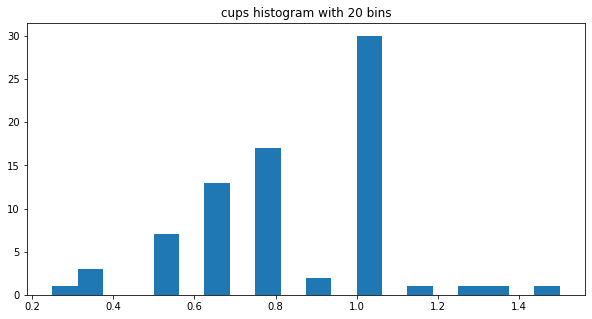

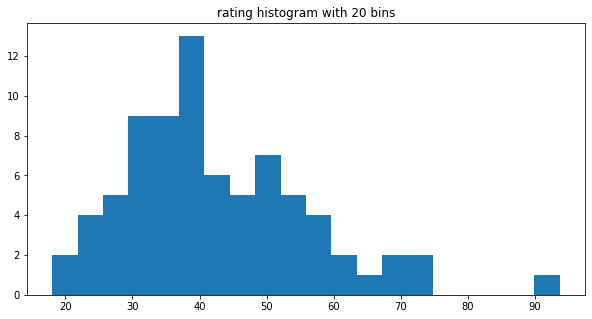

In [6]:
for col in df.columns[1:]: #left col `name` : 77 unique values
    fig = plt.figure(figsize=(10,5))
    bins = 20
    plt.hist(df[col], bins = bins)
    plt.title(str(col) + " histogram with " + str(bins) + " bins")
    plt.show()

### Negative values handling(`carbo`, `sugars`, `potass`) 

In [7]:
df_negative = df[['carbo', 'sugars', 'potass']]
for col in df_negative:
    print('\n' + col + ' value counts')
    print(df[col].value_counts())


carbo value counts
 13.0    8
 15.0    8
 14.0    7
 16.0    7
 21.0    7
 12.0    7
 17.0    6
 11.0    5
 18.0    3
 20.0    3
 8.0     2
 10.5    2
 10.0    2
 22.0    2
 7.0     1
 9.0     1
 19.0    1
 11.5    1
 13.5    1
-1.0     1
 23.0    1
 5.0     1
Name: carbo, dtype: int64

sugars value counts
 3     13
 0      7
 12     7
 6      7
 10     5
 5      5
 8      5
 11     5
 9      4
 7      4
 13     4
 14     3
 2      3
 15     2
 4      1
 1      1
-1      1
Name: sugars, dtype: int64

potass value counts
 110    5
 90     5
 35     5
 25     4
 30     4
 95     4
 40     4
 45     4
 60     3
 100    3
 55     3
 120    3
 190    2
 140    2
 160    2
 170    2
-1      2
 105    2
 240    1
 130    1
 260    1
 135    1
 115    1
 15     1
 20     1
 280    1
 320    1
 65     1
 230    1
 85     1
 80     1
 330    1
 200    1
 50     1
 70     1
 125    1
Name: potass, dtype: int64


Since we have 4 negative values in 3 colums but only 77 rows in dataset, we will try to replace -1 with something else if possible. First, let's print rows with missing values.

In [8]:
for i in df_negative.columns:
    print(df[df[i] == -1])

              name mfr type  calories  protein  fat  sodium  fiber  carbo  \
57  Quaker Oatmeal   Q    H       100        5    2       0    2.7   -1.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  
57      -1     110         0      1     1.0  0.67  50.828392  
              name mfr type  calories  protein  fat  sodium  fiber  carbo  \
57  Quaker Oatmeal   Q    H       100        5    2       0    2.7   -1.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  
57      -1     110         0      1     1.0  0.67  50.828392  
                      name mfr type  calories  protein  fat  sodium  fiber  \
4           Almond Delight   R    C       110        2    2     200    1.0   
20  Cream of Wheat (Quick)   N    H       100        3    0      80    1.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
4    14.0       8      -1        25      3     1.0  0.75  34.384843  
20   21.0       0      -1         0      2     1.0  1.00  64.53

Since row `57` is missing two values, we will drop it. 

In [9]:
df = df.drop([57])
df.shape

(76, 16)

Missing info for `potass` will be replaced with mean value of this column.

In [10]:
bool_index = df.potass == -1
df.loc[bool_index, 'potass'] = df.potass.mean()  

In [11]:
df.iloc[[4,20]]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,95.894737,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,95.894737,0,2,1.0,1.00,64.533816


# Classification problem:
How to choose right shelf for cereal based on given features? 

1. Since we want to use also `mfr` and `type` columns, we need to factorize data for these colums.

In [12]:
cat_feats = ['mfr','type']
df['cat_mfr'] = df.mfr.factorize()[0]
df['cat_type'] = df.type.factorize()[0]
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cat_mfr,cat_type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.000000,25,3,1.0,0.33,68.402973,0,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.000000,0,3,1.0,1.00,33.983679,1,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.000000,25,3,1.0,0.33,59.425505,2,0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.000000,25,3,1.0,0.50,93.704912,2,0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,95.894737,25,3,1.0,0.75,34.384843,3,0


Rearrange columns to have `shelf` values in last column.

In [13]:
cols_at_end = ['shelf']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating,cat_mfr,cat_type,shelf
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.000000,25,1.0,0.33,68.402973,0,0,3
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.000000,0,1.0,1.00,33.983679,1,0,3
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.000000,25,1.0,0.33,59.425505,2,0,3
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.000000,25,1.0,0.50,93.704912,2,0,3
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,95.894737,25,1.0,0.75,34.384843,3,0,3


### Imports for Classifiers

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV

### Creating X, y and splitting the dataset

In [15]:
y = np.array(df.shelf)
X = df.iloc[:,3:-1]
X

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating,cat_mfr,cat_type
0,70,4,1,130,10.0,5.0,6,280.000000,25,1.0,0.33,68.402973,0,0
1,120,3,5,15,2.0,8.0,8,135.000000,0,1.0,1.00,33.983679,1,0
2,70,4,1,260,9.0,7.0,5,320.000000,25,1.0,0.33,59.425505,2,0
3,50,4,0,140,14.0,8.0,0,330.000000,25,1.0,0.50,93.704912,2,0
4,110,2,2,200,1.0,14.0,8,95.894737,25,1.0,0.75,34.384843,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60.000000,25,1.0,0.75,39.106174,4,0
73,110,1,1,140,0.0,13.0,12,25.000000,25,1.0,1.00,27.753301,4,0
74,100,3,1,230,3.0,17.0,3,115.000000,25,1.0,0.67,49.787445,3,0
75,100,3,1,200,3.0,17.0,3,110.000000,25,1.0,1.00,51.592193,4,0


In [16]:
X = X.to_numpy()
X

array([[ 70.      ,   4.      ,   1.      , ...,  68.402973,   0.      ,
          0.      ],
       [120.      ,   3.      ,   5.      , ...,  33.983679,   1.      ,
          0.      ],
       [ 70.      ,   4.      ,   1.      , ...,  59.425505,   2.      ,
          0.      ],
       ...,
       [100.      ,   3.      ,   1.      , ...,  49.787445,   3.      ,
          0.      ],
       [100.      ,   3.      ,   1.      , ...,  51.592193,   4.      ,
          0.      ],
       [110.      ,   2.      ,   1.      , ...,  36.187559,   4.      ,
          0.      ]])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) #using random state to perform the same results

### Scaling features

In [18]:
scaler = MinMaxScaler()
scaler.fit(x_train)
norm_x_train = scaler.transform(x_train)
norm_x_test = scaler.transform(x_test)

### Creating Base KNN Model

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier = knn_classifier.fit(norm_x_train, y_train)

In [20]:
knn_classifier.score(norm_x_train, y_train)

0.72

In [21]:
y_pred = knn_classifier.predict(norm_x_test)
accuracy_score(y_test, y_pred)

0.5769230769230769

Base KNN Model score is 0.57. Now we will try to improve it in 2 ways: `manually` and with `grid_search_cv`

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=20, p=1, leaf_size=5)
knn_classifier =knn_classifier.fit(norm_x_train, y_train)
y_pred = knn_classifier.predict(norm_x_test)
accuracy_score(y_test, y_pred)

0.6538461538461539

With n_neighbors=20, p=1, leaf_size=5, accurancy is 0.65.

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=40, p=2, leaf_size=20, weights='distance')
knn_classifier = knn_classifier.fit(norm_x_train, y_train)
y_pred = knn_classifier.predict(norm_x_test)
accuracy_score(y_test, y_pred)

0.6153846153846154

With n_neighbors=50, p=2, leaf_size=20, weights='distance', accurancy improves to 0.61

### Using `GridSearchCV`:
Now we will try to improve knn accurancy score with cross validation and parameters range using `GridSearchCV` and finally, compare the results.

In [24]:
parameters = {'n_neighbors' : range(1, 40),
              'leaf_size' : range(1,20),
              'weights' : ["uniform", "distance"],
              'p' : [1, 2]}
knn_classifier = KNeighborsClassifier()
cv_kkn_classifier = GridSearchCV(knn_classifier, parameters)
cv_kkn_classifier = cv_kkn_classifier.fit(norm_x_train, y_train)

In [25]:
grid_chosen_classifier = cv_kkn_classifier.best_estimator_
grid_chosen_classifier

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=1,
                     weights='distance')

In [26]:
y_pred = grid_chosen_classifier.predict(norm_x_test)
accuracy_score(y_test, y_pred)

0.6153846153846154

### KNN Comments: 

It turns out you can manually pick the solution with similar `accurancy_score` to `GridSearchCV`.

### Creating Base RF Model

In [27]:
rf_classifier = RandomForestClassifier()
rf_classifier = rf_classifier.fit(x_train, y_train)
rf_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rf_classifier.score(x_train,y_train)

1.0

In [29]:
y_pred = rf_classifier.predict(norm_x_test)
accuracy_score(y_test, y_pred)

0.23076923076923078

Base RF Model acc_score is 0.42. Now we will try to improve it in 2 ways: manually and with `GridSearchCV`

In [30]:
rf_classifier = RandomForestClassifier(min_samples_split = 5, criterion='entropy')
rf_classifier = rf_classifier.fit(x_train, y_train)
rf_classifier.score(x_train,y_train)

0.98

In [31]:
y_pred = rf_classifier.predict(norm_x_test)
accuracy_score(y_test, y_pred)

0.23076923076923078

In [32]:
rf_classifier = RandomForestClassifier(min_samples_split = 2, min_samples_leaf = 4, criterion='entropy')
rf_classifier = rf_classifier.fit(x_train, y_train)
rf_classifier.score(x_train,y_train)

0.76

In [33]:
y_pred = rf_classifier.predict(norm_x_test)
accuracy_score(y_test, y_pred)

0.23076923076923078

Seems like it's not easy to adjust RF classifier manually. We will try to improve score using GridSearchCV.

### Using `GridSearchCV`:

In [34]:
parameters = {'min_samples_split' : range(2, 21, 2),
              'min_samples_leaf' : range(1, 21, 2),
              'criterion' : ["gini", "entropy"]}
rf_classifier = RandomForestClassifier()
cv_rf_classifier = GridSearchCV(rf_classifier, parameters)
cv_rf_classifier = cv_rf_classifier.fit(norm_x_train, y_train)
cv_rf_classifier

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [35]:
grid_chosen_classifier = cv_rf_classifier.best_estimator_
grid_chosen_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred = grid_chosen_classifier.predict(norm_x_test)
accuracy_score(y_test, y_pred)

0.6153846153846154

### RF Comment:

It turns out we can get similar result using RF to knn when GridSearchCV is used. 

# Regression problem:
How good can we predict cereal's rating based on other features? 

Rearrange columns one more time to have `rating` as the last one.

In [37]:
cols_at_end = ['rating']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,cat_mfr,cat_type,shelf,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.000000,25,1.0,0.33,0,0,3,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.000000,0,1.0,1.00,1,0,3,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.000000,25,1.0,0.33,2,0,3,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.000000,25,1.0,0.50,2,0,3,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,95.894737,25,1.0,0.75,3,0,3,34.384843


### Imports

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

### Creating X, y and splitting the dataset

In [39]:
y = np.array(df.shelf)
X = df.iloc[:,3:-1]
X

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,cat_mfr,cat_type,shelf
0,70,4,1,130,10.0,5.0,6,280.000000,25,1.0,0.33,0,0,3
1,120,3,5,15,2.0,8.0,8,135.000000,0,1.0,1.00,1,0,3
2,70,4,1,260,9.0,7.0,5,320.000000,25,1.0,0.33,2,0,3
3,50,4,0,140,14.0,8.0,0,330.000000,25,1.0,0.50,2,0,3
4,110,2,2,200,1.0,14.0,8,95.894737,25,1.0,0.75,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60.000000,25,1.0,0.75,4,0,3
73,110,1,1,140,0.0,13.0,12,25.000000,25,1.0,1.00,4,0,2
74,100,3,1,230,3.0,17.0,3,115.000000,25,1.0,0.67,3,0,1
75,100,3,1,200,3.0,17.0,3,110.000000,25,1.0,1.00,4,0,1


In [40]:
X = X.to_numpy()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) #using random state to perform the same results
x_train.shape

(50, 14)

### Scaling features

In [42]:
scaler = MinMaxScaler()
scaler.fit(x_train)
norm_x_train = scaler.transform(x_train)
norm_x_test = scaler.transform(x_test)

### Creating Base KNN Regression Model

In [43]:
knn_reg = KNeighborsRegressor()
knn_reg = knn_reg.fit(norm_x_train, y_train)
knn_reg.score(norm_x_train, y_train)

0.9245056920311564

In [44]:
y_pred = knn_reg.predict(norm_x_test)
r2_score(y_test, y_pred)

0.9407017543859649

Base KNN Regressor Model score is 0.94. Now we will try to improve it in 2 ways: `manually` and with `grid_search_cv`.

In [45]:
knn_reg = KNeighborsRegressor(n_neighbors = 8, p=2, weights='distance')
knn_reg = knn_reg.fit(norm_x_train, y_train)
knn_reg.score(norm_x_train, y_train)

1.0

In [46]:
y_pred = knn_reg.predict(norm_x_test)
r2_score(y_test, y_pred)

0.9463605162414812

KNN Regressor Model with parameters `n_neighbors` = 8, `p`=2, `weights`='distance' is performingas good as previous one.

In [47]:
knn_reg = KNeighborsRegressor(n_neighbors = 3, p=2, weights='distance')
knn_reg = knn_reg.fit(norm_x_train, y_train)
knn_reg.score(norm_x_train, y_train)

1.0

In [48]:
y_pred = knn_reg.predict(norm_x_test)
r2_score(y_test, y_pred)

0.9078300357742946

KNN Regressor Model with parameters `n_neighbors` = 3, `p`=2, `weights`='distance' is  with `r2_score` 0.91.

### Using GridSearchCV:

In [49]:
parameters = {'n_neighbors' : range(1, 40),
              'leaf_size' : range(1,20),
              'weights' : ["uniform", "distance"],
              'p' : [1, 2]}
knn_reg = KNeighborsRegressor()
cv_kkn_reg = GridSearchCV(knn_reg, parameters)
cv_kkn_reg = cv_kkn_reg.fit(norm_x_train, y_train)

In [50]:
grid_chosen_regressor = cv_kkn_reg.best_estimator_
grid_chosen_regressor

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='distance')

In [51]:
knn_chosen_reg = grid_chosen_regressor.fit(norm_x_train, y_train)
knn_chosen_reg.score(norm_x_train, y_train)

1.0

In [52]:
y_pred = knn_chosen_reg.predict(norm_x_test)
r2_score(y_test, y_pred)

0.9256721303505571

KNN Regressor Model chosen with `GridSearchCV` is performing similar to manual adjustments with `r2_score` 0.93.

### Creating Base RF Regressor Model

In [53]:
rf_reg = RandomForestRegressor()
rf_reg =rf_reg.fit(x_train, y_train)
rf_reg.score(x_train, y_train)

1.0

In [54]:
y_pred = rf_reg.predict(norm_x_test)
r2_score(y_test, y_pred)

-2.535087719298246

Base RF Reg Model r2 score is -2.5. Now we will try to improve it in 2 ways: manually and with `GridSearchCV`

In [55]:
rf_reg = RandomForestRegressor(min_samples_split=5, min_samples_leaf=3)
rf_reg =rf_reg.fit(x_train, y_train)
rf_reg.score(x_train, y_train)

0.9999790293588977

In [56]:
y_pred = rf_reg.predict(norm_x_test)
r2_score(y_test, y_pred)

-2.535087719298246

We have some negative r2 scores, which suggests model overfitting?

### Grid Search:

In [57]:
parameters = {'min_samples_split' : range(2, 21, 2),
              'min_samples_leaf' : range(1, 21, 2),
              'criterion' : ["mse", "mae"]}
rf_reg = RandomForestRegressor()
cv_rf_reg = GridSearchCV(rf_reg, parameters)
cv_rf_reg = cv_rf_reg.fit(norm_x_train, y_train)

In [58]:
grid_chosen_regressor = cv_rf_reg.best_estimator_
grid_chosen_regressor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
rf_chosen_reg = grid_chosen_regressor.fit(norm_x_train, y_train)
rf_chosen_reg.score(norm_x_train, y_train)

0.9999790293588977

In [60]:
y_pred = rf_chosen_reg.predict(norm_x_test)
r2_score(y_test, y_pred)

0.9999714912280702

RF Regressor Model chosen with `GridSearchCV` is performing better than knn with `r2_score` 0.999.

# CONCLUSIONS:
   1. Although the data set is very small (70+ observations), it was possible to create models for classification with `accurancy_score` at 0.65 -0.67. KNN Model tuning is possible manually (although the solution is not optimal in terms of complexity). However, the selection of hyperparameters for FR has to be done using `GridSearchCV` to obtain results comparable to KNN.
   
   2. Regression models are dealing with given dataset mucch better than classification models. Both KNN and RF achieved `r2_score` at 0.9+ and 0.999 respectively, which suggests much better efficiency compared to classification. In case of using RF, it was necessary to use `GridSearchCV` once again because manual selection of hyperparameters usually doesn't provide good results.